# GRIP @ The Sparks Foundation

# Kolakaluri Tejaswini

# Data Science and Business Analytics Intern

# Task 1 - Prediction using Supervised ML


The task deals with predicting the percentage of students based on the number of study hours. We will be using simple linear regression to build our model and to make predictions.This is a simple linear regression task as it involves just 2 variables.

In [47]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [48]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [49]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
print(s_data)
s_data.head()

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [50]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


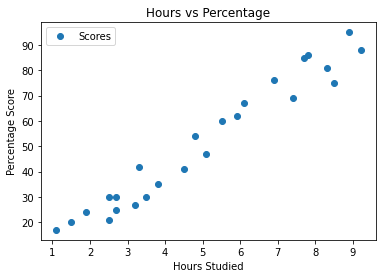

In [51]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [52]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [54]:
print("Coefficient : ",regressor.coef_)

Coefficient :  [9.91065648]


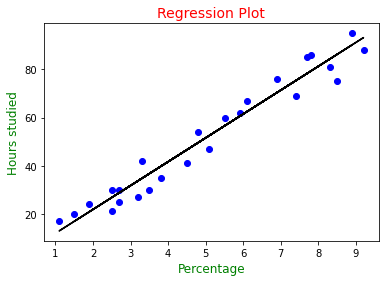

In [55]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Regression Plot', color='r',size=14)
plt.xlabel('Percentage',color='g',size=12)
plt.ylabel('Hours studied',color='g',size=12)
plt.scatter(X, y,color='b')
plt.plot(X, line,color='k');
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [56]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [57]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [58]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# visualization

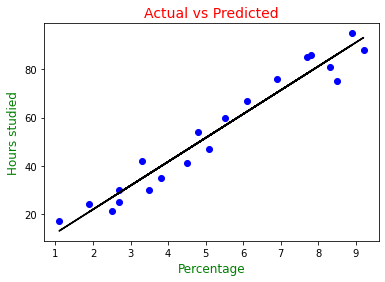

In [59]:
plt.scatter(X_train, y_train,color='b')
plt.plot(X_train, regressor.predict(X_train),color='k');

plt.title('Actual vs Predicted', color='r',size=14)
plt.xlabel('Percentage',color='g',size=12)
plt.ylabel('Hours studied',color='g',size=12)
plt.show()

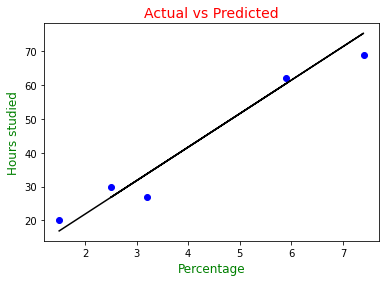

In [60]:
plt.scatter(X_test, y_test,color='b')
plt.plot(X_test, regressor.predict(X_test),color='k');

plt.title('Actual vs Predicted', color='r',size=14)
plt.xlabel('Percentage',color='g',size=12)
plt.ylabel('Hours studied',color='g',size=12)
plt.show()

In [61]:
# You can also test with your own data
hours = 9.25
h=np.reshape(hours,[-1,1])
own_pred = regressor.predict(h)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [62]:
coefficient = regressor.coef_
intercept = regressor.intercept_

line = (s_data['Hours'].values*coefficient)+intercept

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [45]:
print('R2:',metrics.r2_score(y_test,y_pred))

R2: 0.9454906892105354
